🔹 Step 1: Import Libraries & Load Data

In [1]:
import pandas as pd
import numpy as np

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

In [3]:
# Load dataset
df = pd.read_csv(r"D:\Amarjeet Admission\3 Year\SIP PROJECT\Extended_Employee_Performance_and_Productivity_Data.csv")   # change to your filename
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [28]:
df.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [27]:
df.tail()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
99995,99996,Finance,Male,27,Technician,2022-12-07 08:03:05.556036,1,Bachelor,4,4900.0,55,46,5,3,75,16,48,2,1.28,False
99996,99997,IT,Female,36,Consultant,2018-07-24 08:03:05.556036,6,Master,5,8250.0,39,35,7,0,0,10,77,1,3.48,True
99997,99998,Operations,Male,53,Analyst,2015-11-24 08:03:05.556036,8,High School,2,4800.0,31,13,6,5,0,5,87,1,2.60,False
99998,99999,HR,Female,22,Consultant,2015-08-03 08:03:05.556036,9,High School,5,8250.0,35,43,10,1,75,2,31,1,3.10,False
99999,100000,Finance,Female,43,Analyst,2024-03-04 08:03:05.556036,0,PhD,1,4400.0,51,43,27,11,75,13,45,1,2.64,False


In [29]:
df.isnull().sum()

Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Hire_Date                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64

🔹 Step 2: Preprocessing

In [5]:
# Drop Employee_ID (unique identifier, not useful for ML)
df = df.drop(columns=["Employee_ID"], errors="ignore")

# Convert Hire_Date to useful features (e.g., Year of Joining)
if "Hire_Date" in df.columns:
    df["Hire_Date"] = pd.to_datetime(df["Hire_Date"], errors="coerce")
    df["Year_Of_Joining"] = df["Hire_Date"].dt.year
    df["Tenure"] = 2025 - df["Year_Of_Joining"]  # assuming current year
    df = df.drop(columns=["Hire_Date"])

# Encode categorical variables
cat_cols = df.select_dtypes(include=["object"]).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Fill missing values
df = df.fillna(df.median(numeric_only=True))


Step 3A: Salary Prediction (Regression)

In [6]:
# Features & Target
X = df.drop(columns=["Monthly_Salary", "Resigned"], errors="ignore")
y = df["Monthly_Salary"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Random Forest (better than Linear Regression for non-linear patterns)
reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train, y_train)

# Predictions
y_pred = reg_model.predict(X_test)

# Evaluation
print("Salary Prediction Results:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))


Salary Prediction Results:
MAE: 0.0
RMSE: 0.0
R²: 1.0


🔹 Step 3B: Churn Prediction (Classification)

In [7]:
# Features & Target
X = df.drop(columns=["Monthly_Salary", "Resigned"], errors="ignore")
y = df["Resigned"].astype(int)   # True/False → 1/0

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("\nChurn Prediction Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))



Churn Prediction Results:
Accuracy: 0.90145
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


C:\Users\aksha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


🔹 Step 4: Feature Importance (Insights)

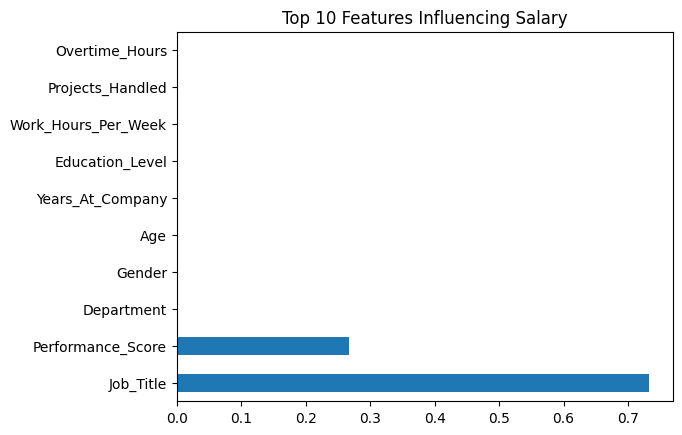

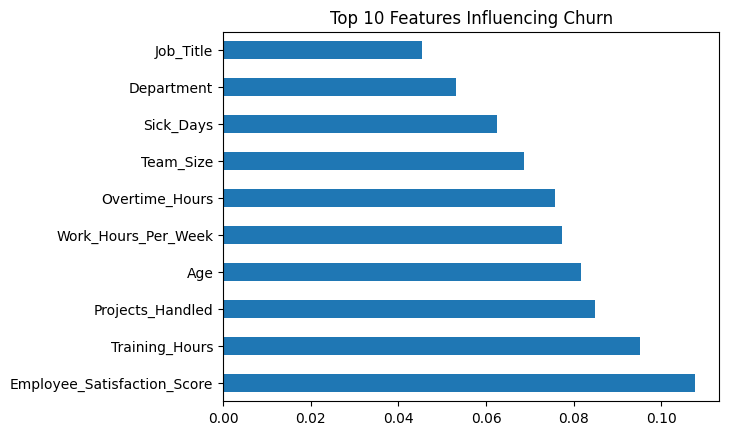

In [8]:
# Feature Importance for Salary Prediction
import matplotlib.pyplot as plt

feat_importances = pd.Series(reg_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Features Influencing Salary")
plt.show()

# Feature Importance for Churn Prediction
feat_importances_clf = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances_clf.nlargest(10).plot(kind='barh')
plt.title("Top 10 Features Influencing Churn")
plt.show()


🔹 Step 5: Productivity & Performance Analysis

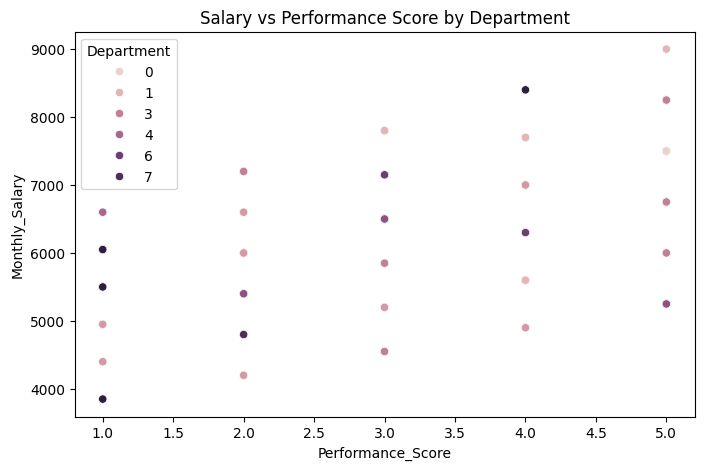

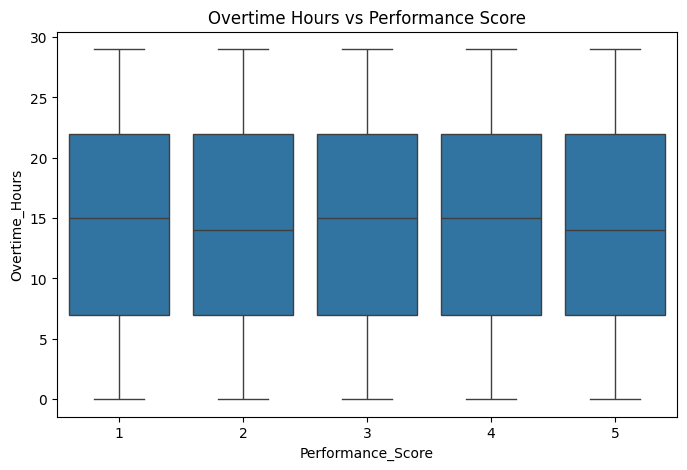

C:\Users\aksha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


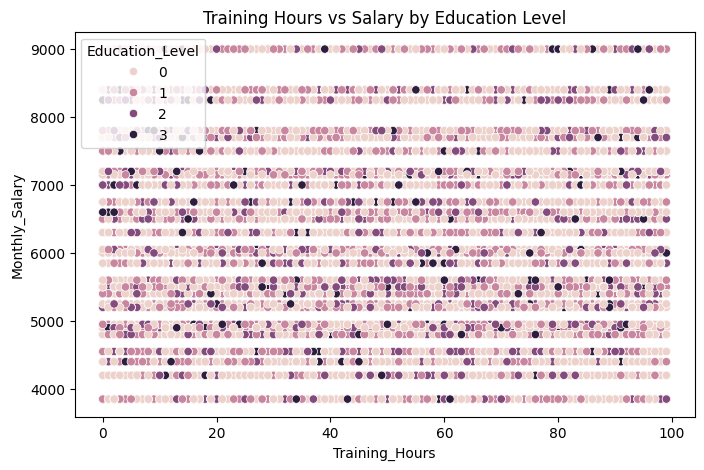

C:\Users\aksha\AppData\Local\Temp\ipykernel_9480\3757048721.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Projects_Handled", y="Monthly_Salary", ci=None)


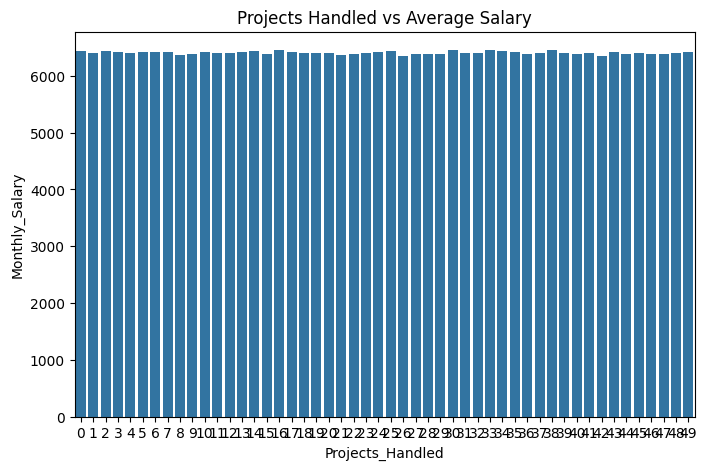

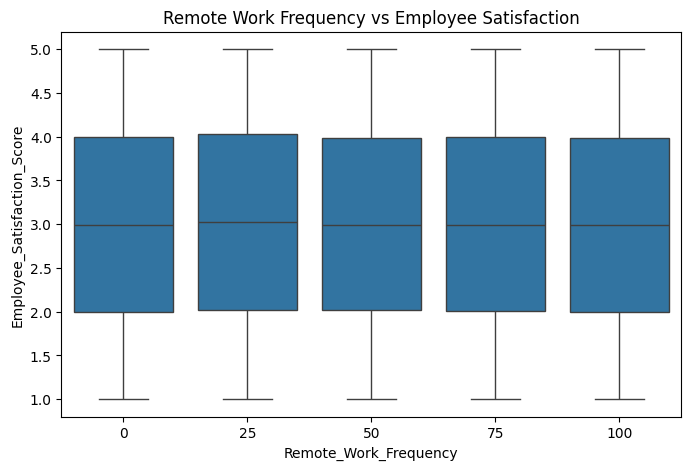

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Salary vs Performance ---
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Performance_Score", y="Monthly_Salary", hue="Department")
plt.title("Salary vs Performance Score by Department")
plt.show()

# --- 2. Overtime vs Performance ---
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Performance_Score", y="Overtime_Hours")
plt.title("Overtime Hours vs Performance Score")
plt.show()

# --- 3. Training vs Salary ---
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Training_Hours", y="Monthly_Salary", hue="Education_Level")
plt.title("Training Hours vs Salary by Education Level")
plt.show()

# --- 4. Productivity (Projects Handled) vs Salary ---
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Projects_Handled", y="Monthly_Salary", ci=None)
plt.title("Projects Handled vs Average Salary")
plt.show()

# --- 5. Remote Work & Satisfaction ---
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Remote_Work_Frequency", y="Employee_Satisfaction_Score")
plt.title("Remote Work Frequency vs Employee Satisfaction")
plt.show()


🔹 Step 6: Performance Evaluation Insights


Number of High Performers with Below-Average Salary: 14207
    Department  Job_Title  Performance_Score  Monthly_Salary
6            4          6                  5          5250.0
11           0          6                  5          5250.0
12           3          6                  4          4900.0
13           1          0                  4          5600.0
22           2          5                  4          6300.0


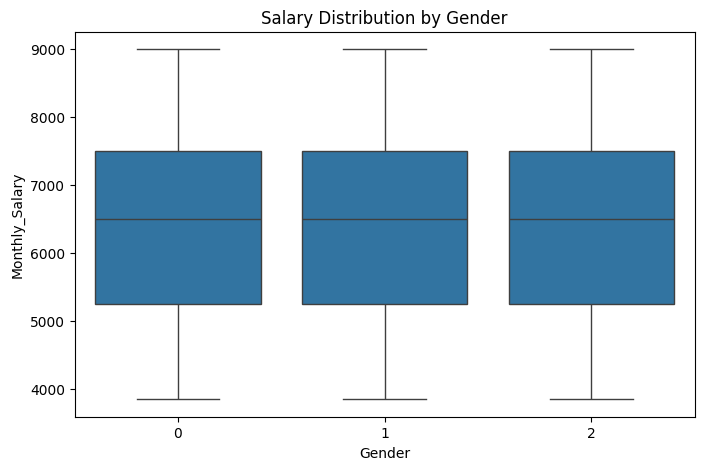

0 = First gender category (e.g., 'Male')
1 = Second gender category (e.g., 'Female')
2 = Third gender category (e.g., 'Other' or another value)


C:\Users\aksha\AppData\Local\Temp\ipykernel_9480\525726713.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Education_Level", y="Monthly_Salary", ci=None)


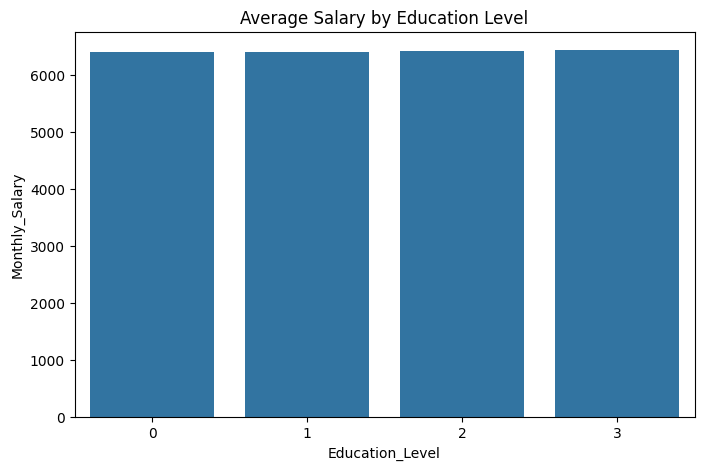

0 = First education category (e.g., 'High School')
1 = Second education category (e.g., 'Bachelor')
2 = Third education category (e.g., 'Master')
3 = Fourth education category (e.g., 'PhD' or another value)


In [14]:
# --- 6. High Performers but Low Salary (Retention Risk) ---
avg_salary = df["Monthly_Salary"].mean()
high_perf = df[(df["Performance_Score"] >= 4) & (df["Monthly_Salary"] < avg_salary)]

print("Number of High Performers with Below-Average Salary:", len(high_perf))
print(high_perf[["Department","Job_Title","Performance_Score","Monthly_Salary"]].head())

# --- 7. Salary Fairness by Gender ---
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Gender", y="Monthly_Salary")
plt.title("Salary Distribution by Gender")
plt.show()

print("0 = First gender category (e.g., 'Male')")
print("1 = Second gender category (e.g., 'Female')")
print("2 = Third gender category (e.g., 'Other' or another value)")

# --- 8. Salary vs Education ---
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Education_Level", y="Monthly_Salary", ci=None)
plt.title("Average Salary by Education Level")
plt.show()

print("0 = First education category (e.g., 'High School')")
print("1 = Second education category (e.g., 'Bachelor')")
print("2 = Third education category (e.g., 'Master')")
print("3 = Fourth education category (e.g., 'PhD' or another value)")

🔹 Step 7: Churn & Retention Insights

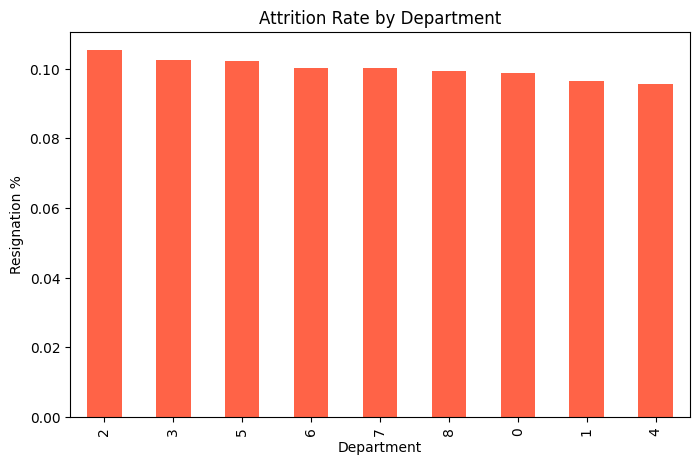

0:Human Resources
1:Finance
2:Information Technology
3:Marketing
4:Sales
5:Operations
6:Research & Development
7:Customer Service
8:Administration


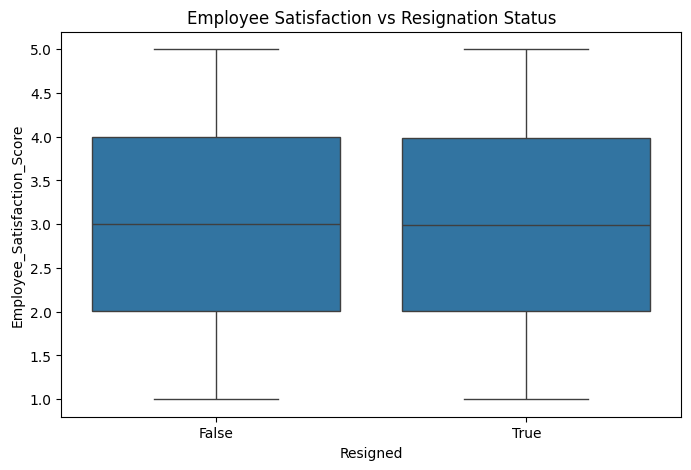

False = Not Resigned
True = Resigned


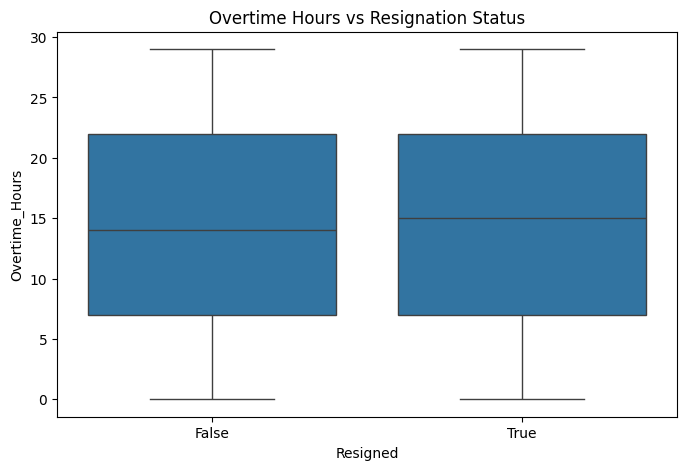

In [19]:
# --- 9. Attrition Rate by Department ---
attrition_rate = df.groupby("Department")["Resigned"].mean().sort_values(ascending=False)
attrition_rate.plot(kind="bar", figsize=(8,5), color="tomato")
plt.title("Attrition Rate by Department")
plt.ylabel("Resignation %")
plt.show()

print("""0:Human Resources
1:Finance
2:Information Technology
3:Marketing
4:Sales
5:Operations
6:Research & Development
7:Customer Service
8:Administration""")

# --- 10. Attrition vs Satisfaction ---
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Resigned", y="Employee_Satisfaction_Score")
plt.title("Employee Satisfaction vs Resignation Status")
plt.show()

print("False = Not Resigned")
print("True = Resigned")

# --- 11. Attrition vs Overtime ---
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Resigned", y="Overtime_Hours")
plt.title("Overtime Hours vs Resignation Status")
plt.show()


In [22]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib   # for saving and loading the model

# Step 2: Load dataset (replace with your CSV path)
df = pd.read_csv(r"D:\Amarjeet Admission\3 Year\SIP PROJECT\Extended_Employee_Performance_and_Productivity_Data.csv")

# Step 3: Select features & target
# Use columns present in your dataframe
X = df[["Years_At_Company", "Performance_Score", "Education_Level", "Training_Hours"]]
y = df["Monthly_Salary"]

# Step 4: Encode categorical features if needed
# Example: Education_Level -> numerical mapping
education_map = {"High School": 1, "Bachelor": 2, "Master": 3, "PhD": 4}
X["Education_Level"] = X["Education_Level"].map(education_map)

# Step 5: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Save model to file
joblib.dump(model, "salary_prediction_model.pkl")
print("✅ Model saved as salary_prediction_model.pkl")

# Step 8: Load model again (when needed)
loaded_model = joblib.load("salary_prediction_model.pkl")

# Example prediction
sample = [[5, 4, 3, 20]]   # [Experience_Years, Performance_Score, Education_Level, Training_Hours]
predicted_salary = loaded_model.predict(sample)
print("💰 Predicted Salary:", predicted_salary[0])


✅ Model saved as salary_prediction_model.pkl
💰 Predicted Salary: 6914.697075484488


C:\Users\aksha\AppData\Local\Temp\ipykernel_9480\829244942.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Education_Level"] = X["Education_Level"].map(education_map)
C:\Users\aksha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# CHURN PREDICTION

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load dataset
df = pd.read_csv(r"D:\Amarjeet Admission\3 Year\SIP PROJECT\Extended_Employee_Performance_and_Productivity_Data.csv")

# Features for churn prediction
X = df[["Age", "Overtime_Hours", "Employee_Satisfaction_Score", 
        "Remote_Work_Frequency", "Performance_Score", "Training_Hours"]]
y = df["Resigned"]   # Target column (0 = Active, 1 = Resigned)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model (Random Forest for classification)
churn_model = RandomForestClassifier(n_estimators=100, random_state=42)
churn_model.fit(X_train, y_train)

# Save model
joblib.dump(churn_model, "employee_churn_model.pkl")
print("✅ Churn model saved as employee_churn_model.pkl")

# Load model
loaded_churn = joblib.load("employee_churn_model.pkl")

# Example prediction
sample = [[30, 50, 2.5, 25, 3, 40]]  
# [Age, Overtime_Hours, Satisfaction, Remote %, Performance, Training Hours]
prediction = loaded_churn.predict(sample)
print("🚪 Resigned Prediction:", "Yes" if prediction[0]==1 else "No")


✅ Churn model saved as employee_churn_model.pkl
🚪 Resigned Prediction: No


C:\Users\aksha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Productivity & Performance Analysis

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Features related to productivity
X = df[["Projects_Handled", "Work_Hours_Per_Week", "Overtime_Hours", 
        "Training_Hours", "Employee_Satisfaction_Score", "Team_Size"]]
y = df["Performance_Score"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train regression model
productivity_model = RandomForestRegressor(n_estimators=100, random_state=42)
productivity_model.fit(X_train, y_train)

# Save model
joblib.dump(productivity_model, "employee_productivity_model.pkl")
print("✅ Productivity model saved as employee_productivity_model.pkl")

# Load model
loaded_productivity = joblib.load("employee_productivity_model.pkl")

# Example prediction
sample = [[12, 40, 10, 25, 3.8, 8]]  
# [Projects, Work Hours, Overtime, Training, Satisfaction, Team Size]
pred_score = loaded_productivity.predict(sample)
print("📊 Predicted Performance Score:", pred_score[0])

✅ Productivity model saved as employee_productivity_model.pkl
📊 Predicted Performance Score: 3.11


C:\Users\aksha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
